# Tempus Case Study 

In [1]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import csv 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.grid_search import GridSearchCV  
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scikitplot as skplt

/home/ratnam/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/ratnam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ratnam/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.

# Data Load 

In [2]:
# Loading the Data 
Data = pd.read_csv("/home/ratnam/Work/Tempus/DScasestudy_1.txt", sep="\t")

# Data Initial Check 

In [3]:
# Data Information 
print(Data.info()) 
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 16563 entries, response to V16562
dtypes: int64(16563)
memory usage: 67.0 MB
None



In [4]:
# Data Representation s
Data.head(2)

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Checking the Distribution of the Response Variable 
Data.groupby('response')['response'].count() 

response
0    407
1    123
Name: response, dtype: int64

In [6]:
# Data Describe 
Data.describe()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
count,530.000000,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000,530.000000,530.0,...,530.000000,530.0,530.0,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000
mean,0.232075,0.009434,0.009434,0.001887,0.0,0.020755,1.0,0.001887,0.030189,0.0,...,0.158491,0.0,0.0,0.001887,0.020755,0.013208,0.0,0.003774,0.0,0.447170
std,0.422556,0.096761,0.096761,0.043437,0.0,0.142697,0.0,0.043437,0.171268,0.0,...,0.365545,0.0,0.0,0.043437,0.142697,0.114270,0.0,0.061371,0.0,0.497671
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [7]:
# Checking the Shape of the Data 
print("Shape of the Data with Rows and Dimentions" ,Data.shape)

Shape of the Data with Rows and Dimentions (530, 16563)


In [8]:
# Checking the Dimentions of the Data 
print("Number of Dimentions in the Data" , Data.ndim)

Number of Dimentions in the Data 2


In [9]:
# Checking the Null Values in the Python 
print("Are there any null value in the Data" , Data.isnull().values.any())

Are there any null value in the Data False


# Data Cleanup 

In [10]:
# Selecting the COlumns wich have Constant Value 
# For Example V1 has value '0' only then remove such columns 
Data_check = Data.describe().transpose().reset_index()
Remove_Vartiables = Data_check['index'][Data_check['min'] == Data_check['max']].reset_index()

In [11]:
# Dropping the Columns 
Data = Data.drop(columns=Remove_Vartiables['index'])

In [12]:
Data.head(2)

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# All values are Integer 
Data.dtypes.nunique()

1

In [14]:
Data.describe()

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.232075,0.009434,0.009434,0.001887,0.020755,0.001887,0.030189,0.009434,0.130189,0.416981,...,0.666038,0.013208,0.003774,0.022642,0.158491,0.001887,0.020755,0.013208,0.003774,0.447170
std,0.422556,0.096761,0.096761,0.043437,0.142697,0.043437,0.171268,0.096761,0.336829,0.493526,...,0.472072,0.114270,0.061371,0.148898,0.365545,0.043437,0.142697,0.114270,0.061371,0.497671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([407.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 123.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

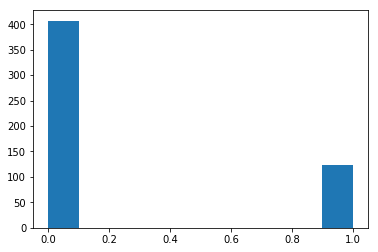

In [15]:
%matplotlib inline
plt.hist(Data['response'])

In [16]:
# Checking the Shape of the Data 
Data.shape

(530, 10894)

In [17]:
Data.head(2)

,response,V1,V2,V3,V5,V7,V8,V11,V13,V17,...,V16549,V16550,V16551,V16552,V16553,V16556,V16557,V16558,V16560,V16562
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
Y = Data['response']
X = Data.loc[:, Data.columns != 'response']

# Covariance matrix plot 

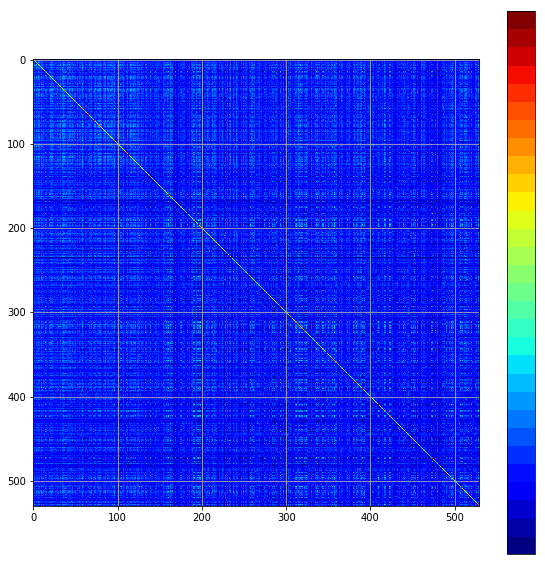

In [19]:
def cov_matix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(np.cov(df), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

cov_matix(X)

In [20]:
X.values.shape

(530, 10893)

In [21]:
# Train Test Split 
# Split the data into training and test sets (30% held out for testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Over Sampling of Data on Imbalanced Dataset 

In [22]:
# Balancing  the Unbalanced Data 
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.sample(X_train, y_train)

In [23]:
print("Balanced Data Count " , pd.DataFrame(y_resampled,columns=['X']).groupby('X')['X'].count())

Balanced Data Count  X
0    333
1    333
Name: X, dtype: int64


# PCA on the n-Dimentions Data 

In [24]:
# Applying the PCA 
pca = PCA(.99)
pca_model = pca.fit(X_resampled)

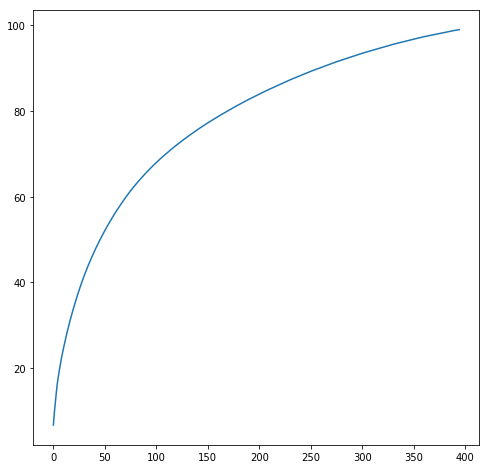

In [25]:
varx=np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=4)*100)
plt.figure(figsize=(8, 8))
plt.plot(varx)

# Plotting PCA Data in 3D plane 

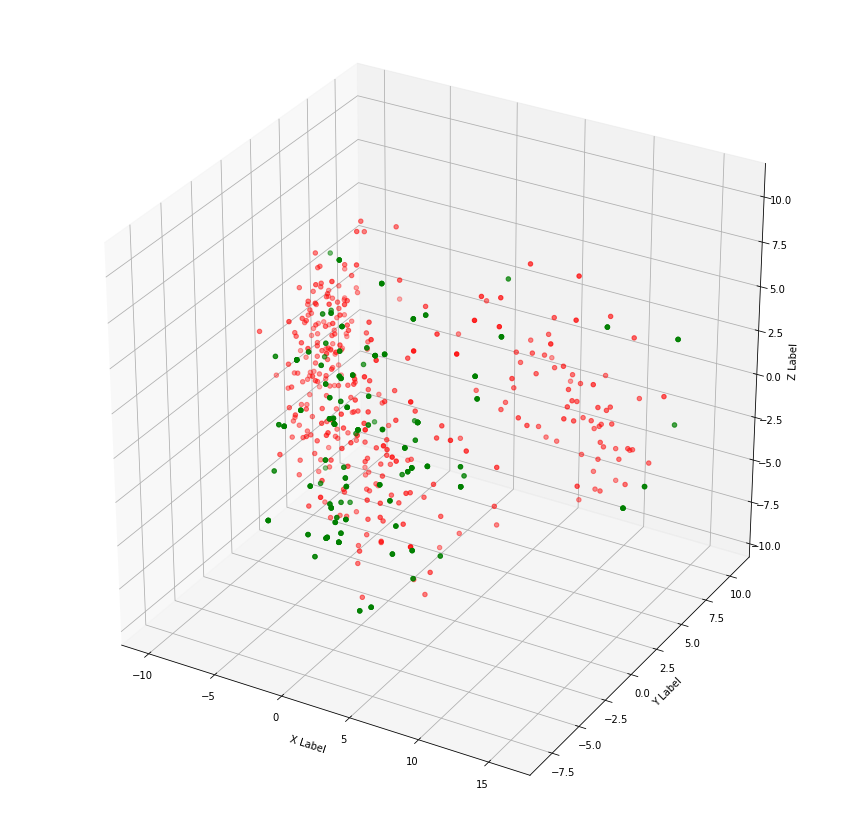

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Applying the PCA 
pca = PCA(n_components=3)
pca_model = pca.fit(X_resampled)
Data_X_ana  = pca.transform(X_resampled)
                            
Temp1 = pd.DataFrame(Data_X_ana , columns=['X','Y','Z'])
Temp1['Pred'] = y_resampled

def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

width = 15
height = 15
fig = plt.figure(figsize=(width, height))
ax = fig.add_subplot(111, projection='3d')
colors = ['red','green']
xs = Temp1['X']
ys = Temp1['Y']
zs = Temp1['Z']
ax.scatter(xs, ys, zs, c=Temp1['Pred'] , cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Transformation of Data in PCA

In [27]:
# Transforming Train Data 
pca = PCA(n_components=90,random_state=100)
pca_model = pca.fit(X_resampled)
New_data = pca.transform(X_resampled)
PCA_Dataframe_X = pd.DataFrame(New_data)
#PCA_Dataframe_X.columns=['A','B','C','D','E']
# Trnasforming Test with pCA 
XOS_test = pca.transform(X_test)
XOS_test_final = pd.DataFrame(XOS_test)

In [28]:
PCA_Dataframe_X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,6.132659,2.461131,-6.252204,-3.611051,2.687767,-0.914402,-1.608406,-7.652789,-1.273020,-1.582256,...,1.158796,2.988985,1.986913,-5.296134,0.106527,0.244024,-0.541145,-0.833506,-1.450838,0.432450
1,-8.419878,3.761477,2.673144,-0.822151,-0.330035,3.395655,-0.619674,2.844307,-1.482058,1.289793,...,0.065407,-1.227233,-0.101285,-0.896684,-0.751422,1.588580,0.478440,-0.255214,0.419622,-1.409642


# Model Selection 

KNN: 0.550503 (0.097823)
CART: 0.980641 (0.030189)
GBBosst: 0.965641 (0.046189)
NB: 0.897847 (0.084073)
SVM: 0.962459 (0.051745)


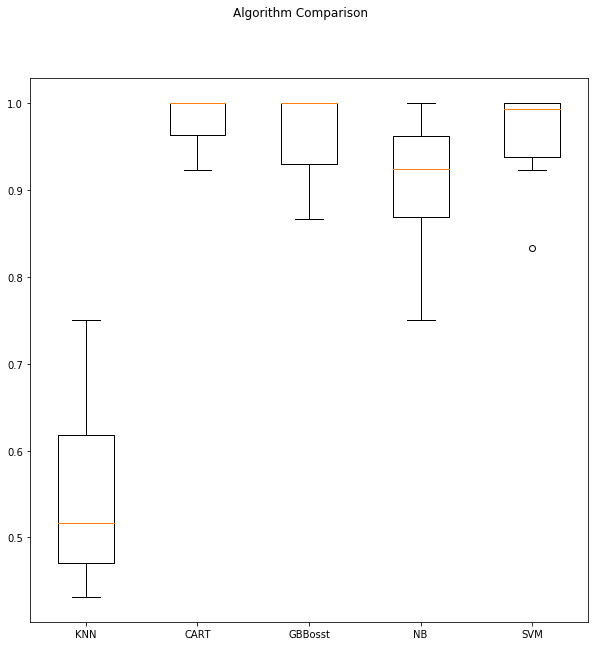

In [29]:
seed = 200
# prepare models
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GBBosst', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model,PCA_Dataframe_X , y_resampled, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Hyperparameter Model Tuning 

In [30]:
tuned_parameters = [{'kernel': ['linear'], 'C': [10, 25, 50] ,'gamma': [1e-2, 1e-3, 1e-4]}]

scores = ['precision', 'recall']

for score in scores:
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='roc_auc')
    clf.fit(PCA_Dataframe_X , y_resampled)


print("Best parameters set found on development set:")
clf.best_params_


Best parameters set found on development set:


{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}

# Tuned Model with Tuned Hyperparameters  

In [31]:
from sklearn import svm 
svm_model_0 = svm.SVC(kernel='linear', C=10, gamma=0.01 ,probability=True) 
svm_model_0.fit(PCA_Dataframe_X , y_resampled)

#Predict Output
predicted_0= svm_model_0.predict(XOS_test_final)
print(classification_report(y_test, predicted_0))

             precision    recall  f1-score   support

          0       0.85      0.96      0.90        74
          1       0.86      0.59      0.70        32

avg / total       0.85      0.85      0.84       106



# Cross validation 

In [32]:
accuracy = round(cross_val_score(svm_model_0, XOS_test_final, y_test, scoring='roc_auc', cv = 20).mean() * 100)
print("Average Accuracy of SVM is: " , accuracy)
 

Average Accuracy of SVM is:  72.0


# Model Scoring 

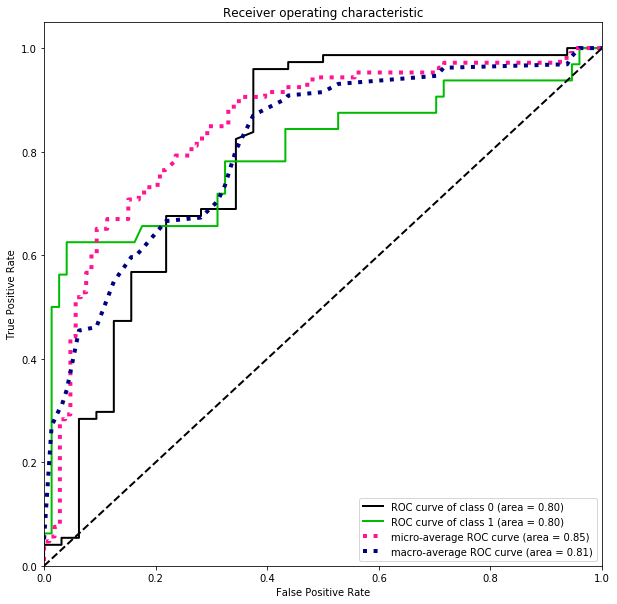

In [33]:
y_probas = svm_model_0.predict_proba(XOS_test_final)
skplt.metrics.plot_roc(y_test, y_probas,figsize=(10, 10) ,title='Receiver operating characteristic' ,plot_macro=True,plot_micro=True)
plt.show()

# Confusion Matrix 

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test,predicted_0).ravel()
print ("True Positives:", tp)
print ("True Negatives:", tn)
print ("False Positives:", fp)
print ("False Negatives:", fn)

True Positives: 19
True Negatives: 71
False Positives: 3
False Negatives: 13
